# 8. PyTorch Computer Vision

In [ ]:
# Check for GPU
!nvidia-smi

Sat Aug 26 12:10:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

2.0.1+cu118
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Self-driving cars, such as Tesla using computer vision to percieve what's happening on the road. See Tesla AI day for more - https://youtu.be/j0z4FweCy4M
2. Healthcare imaging, such as using computer vision to help interpret X-rays. Google also uses computer vision for detecting polyps in the intenstines - https://ai.googleblog.com/2021/08/improved-detection-of-elusive-polyps.html
3. Security, computer vision can be used to detect whether someone is invading your home or not - https://store.google.com/au/product/nest_cam_battery?hl=en-GB


Here are a few examples of established computer vision tasks:

- **Image classification** sees an image and can classify it (a dog, an apple, a person’s face). More precisely, it is able to accurately predict that a given image belongs to a certain class. For example, a social media company might want to use it to automatically identify and segregate objectionable images uploaded by users.

- **Object detection** can use image classification to identify a certain class of image and then detect and tabulate their appearance in an image or video. Examples include detecting damages on an assembly line or identifying machinery that requires maintenance.

- **Object tracking** follows or tracks an object once it is detected. This task is often executed with images captured in sequence or real-time video feeds. Autonomous vehicles, for example, need to not only classify and detect objects such as pedestrians, other cars and road infrastructure, they need to track them in motion to avoid collisions and obey traffic laws.

- **Content-based image retrieval** uses computer vision to browse, search and retrieve images from large data stores, based on the content of the images rather than metadata tags associated with them. This task can incorporate automatic image annotation that replaces manual image tagging. These tasks can be used for [digital asset management](https://www.ibm.com/topics/digital-asset-management) systems and can increase the accuracy of search and retrieval.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

- Overfitting is like memorizing for a test but then you can't answer a question that's slightly different.

In other words, if a model is overfitting, it's learning the training data too well and these patterns don't generalize to unseen data.

- Overfitting is a concept in data science, which occurs when a statistical model fits exactly against its training data. When this happens, the algorithm unfortunately cannot perform accurately against unseen data, defeating its purpose. Generalization of a model to new data is ultimately what allows us to use machine learning algorithms every day to make predictions and classify data.

When machine learning algorithms are constructed, they leverage a sample dataset to train the model. However, when the model trains for too long on sample data or when the model is too complex, it can start to learn the “noise,” or irrelevant information, within the dataset. When the model memorizes the noise and fits too closely to the training set, the model becomes “overfitted,” and it is unable to generalize well to new data. If a model cannot generalize well to new data, then it will not be able to perform the classification or prediction tasks that it was intended for.

Low error rates and a high variance are good indicators of overfitting. In order to prevent this type of behavior, part of the training dataset is typically set aside as the “test set” to check for overfitting. If the training data has a low error rate and the test data has a high error rate, it signals overfitting.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

See this article for some ideas: https://elitedatascience.com/overfitting-in-machine-learning

3 ways to prevent overfitting:
1. **Regularization techniques** - You could use [dropout on your neural networks](https://en.wikipedia.org/wiki/Dilution_(neural_networks)), dropout involves randomly removing neurons in different layers so that the remaining neurons hopefully learn more robust weights/patterns.
2. **Use a different model** - maybe the model you're using for a specific problem is too complicated, as in, it's learning the data too well because it has so many layers. You could remove some layers to simplify your model. Or you could pick a totally different model altogether, one that may be more suited to your particular problem. Or... you could also use [transfer learning](https://en.wikipedia.org/wiki/Transfer_learning) (taking the patterns from one model and applying them to your own problem).
3. **Reduce noise in data/cleanup dataset/introduce data augmentation techniques** - If the model is learning the data too well, it might be just memorizing the data, including the noise. One option would be to remove the noise/clean up the dataset or if this doesn't, you can introduce artificial noise through the use of data augmentation to artificially increase the diversity of your training dataset.


**OTHER METHODS ARE:**

You can prevent overfitting by diversifying and scaling your training data set or using some other data science strategies, like those given below.

***Early stopping***

Early stopping pauses the training phase before the machine learning model learns the noise in the data. However, getting the timing right is important; else the model will still not give accurate results.

***Pruning***

You might identify several features or parameters that impact the final prediction when you build a model. Feature selection—or pruning—identifies the most important features within the training set and eliminates irrelevant ones. For example, to predict if an image is an animal or human, you can look at various input parameters like face shape, ear position, body structure, etc. You may prioritize face shape and ignore the shape of the eyes.

***Regularization***

Regularization is a collection of training/optimization techniques that seek to reduce overfitting. These methods try to eliminate those factors that do not impact the prediction outcomes by grading features based on importance. For example, mathematical calculations apply a penalty value to features with minimal impact. Consider a statistical model attempting to predict the housing prices of a city in 20 years. Regularization would give a lower penalty value to features like population growth and average annual income but a higher penalty value to the average annual temperature of the city.

***Ensembling***

Ensembling combines predictions from several separate machine learning algorithms. Some models are called weak learners because their results are often inaccurate. Ensemble methods combine all the weak learners to get more accurate results. They use multiple models to analyze sample data and pick the most accurate outcomes. The two main ensemble methods are bagging and boosting. Boosting trains different machine learning models one after another to get the final result, while bagging trains them in parallel.

***Data augmentation***

Data augmentation is a machine learning technique that changes the sample data slightly every time the model processes it. You can do this by changing the input data in small ways. When done in moderation, data augmentation makes the training sets appear unique to the model and prevents the model from learning their characteristics. For example, applying transformations such as translation, flipping, and rotation to input images.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

The CNN explainer website is a great insight into all of the nuts and bolts of a convolutional neural network.

Uploaded the image of CR7.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
# Import torch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


In [ ]:
# Setup training data
from torchvision import datasets

# Get the MNIST dataset
train_data = datasets.MNIST(
    root="data",                                 # Where to download data to?
    train=True,                                  # Do we want training dataset? - If it's false we'll get testing dataset
    download=True,                               # Do we want to download the dataset and put it in root directory?
    transform=torchvision.transforms.ToTensor(), # Transforming the dataset to tensor
    target_transform=None                        # Do we want to transform the labels/targets/image?
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 9912422/9912422 [00:00<00:00, 121460218.24it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 36942877.04it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 31299716.22it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17240297.53it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# Data is in tuple form
img = train_data[0][0]
label = train_data[0][1]
print(f"Image:\n {img}")
print(f"Label:\n {label}")

Image:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
# Get the class names from the dataset
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
# Get the corresponding index to the class names
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
# Check the shapes of our image
print(f"Image shape: {img.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: 5 - five


**NOTE:** There are two main agreed upon ways for representing images in Machine Learning:

1. Color channels first: [color_channels, height, width] (CHW) -> PyTorch default

2. Color channels last: [height, width, color_channels] (HWC) -> Matplotlib/TensorFlow default

## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])
torch.Size([28, 28])


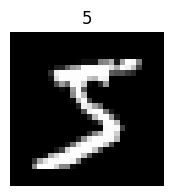

torch.Size([1, 28, 28])
torch.Size([28, 28])


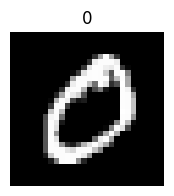

torch.Size([1, 28, 28])
torch.Size([28, 28])


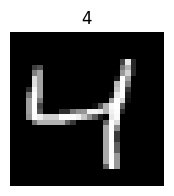

torch.Size([1, 28, 28])
torch.Size([28, 28])


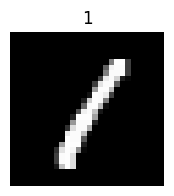

torch.Size([1, 28, 28])
torch.Size([28, 28])


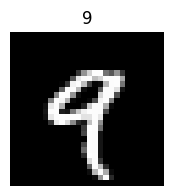

In [ ]:
import matplotlib.pyplot as plt
for i in range(5):
  img = train_data[i][0]
  print(img.shape)
  img_squeeze = img.squeeze()
  print(img_squeeze.shape)
  label=train_data[i][1]
  plt.figure(figsize=(2, 2))
  plt.imshow(img_squeeze, cmap="gray")
  plt.title(label)
  plt.axis(False)
  plt.show()

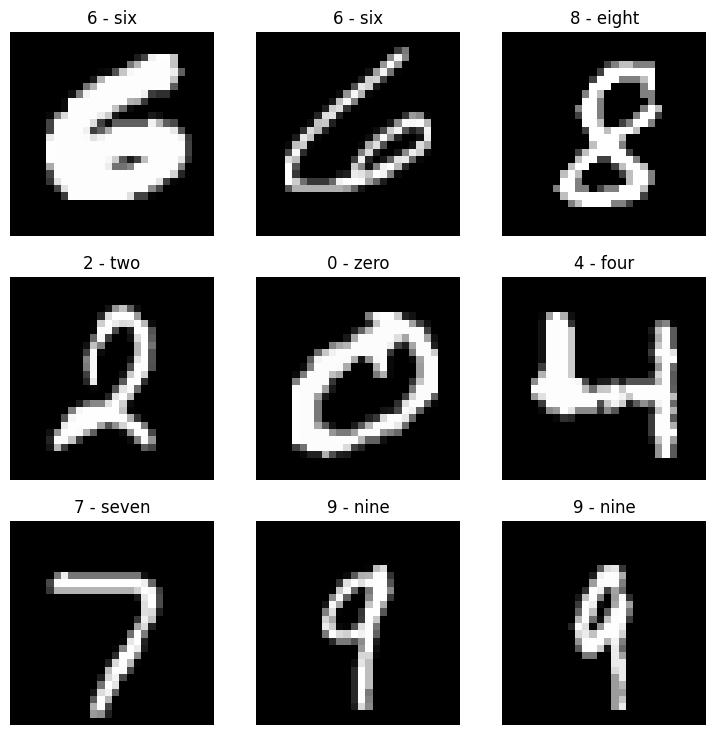

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

It's difficult for a model and time consuming to learn patterns every 60,000 images etc., so to make it memory and time efficient, we create batches of images for a set sample size (BATCH SIZE) and update the model to learn patterns accordingly.

In [ ]:
# Create train dataloader
from torch.utils.data import DataLoader

# Setup the batch size 32
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

The shuffle argument in the PyTorch DataLoader class controls whether or not the data is shuffled before each epoch. Setting shuffle=True randomizes the order of the data, which helps to prevent the model from overfitting to the training data. Overfitting occurs when the model learns the specific features of the training data too well, and is not able to generalize to new data.

For the training dataloader, we want to shuffle the data so that the model does not learn to predict the labels based on the order of the data. This helps to ensure that the model is learning the underlying patterns in the data, rather than simply memorizing the order of the data.

For the test_dataloader, we do not want to shuffle the data. This is because we want to evaluate the model's performance on the data in the order that it will be encountered in the real world. Shuffling the data would give the model an unfair advantage, as it would not be able to see the data in the same order as it would be presented to it in the real world.
Our model never sees the test dataloader.

In general, it is a good practice to shuffle the data for the training dataloader and not shuffle the data for the test_dataloader. This helps to prevent overfitting and ensures that the model is evaluated on its ability to generalize to new data.

Here is a table summarizing the effects of shuffling the data on overfitting:

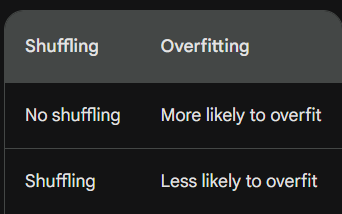

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fdb36fe7910>,
 <torch.utils.data.dataloader.DataLoader at 0x7fdb34a6b1c0>)

In [ ]:
# Let's check out what we have created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} (BATCHES of {BATCH_SIZE}).")
print(f"Length of test dataloader: {len(test_dataloader)} (BATCHES of {BATCH_SIZE}).")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fdb36fe7910>, <torch.utils.data.dataloader.DataLoader object at 0x7fdb34a6b1c0>)
Length of train dataloader: 1875 (BATCHES of 32).
Length of test dataloader: 313 (BATCHES of 32).


In [ ]:
# Getting the next iterable for the train dataloader batch
next(iter(train_dataloader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [ ]:
# Check out what's inside the training dataloader
""" NOTE: To check the shape of the data for output classifier in the
MNIST model created below (question 8) for figuring out the input features."""

train_features_batch, train_labels_batch = next(iter(train_dataloader))   # Getting the next iterable for the train dataloader batch
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 0


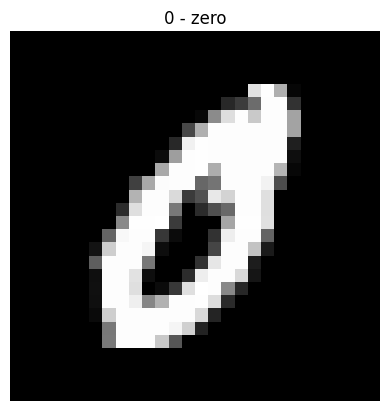

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}")

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

`MaxPool2d()` layer helps to select the pixel with the highest val, as it should contain the maximum information and we compress our inout by half, potentially we are still preserving the most important patterns in our image.

In [ ]:
from torch import nn
class MNIST_model(nn.Module):
  """Model capable of predicting on MNIST dataset."""
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
    """ Where did this hidden_units*7*7 came from?
    we multiplied the hidden units by 7*7 because the original image shape is
    (1, 28, 28) and we passed it throught the first block so we get
    (1, 10, 14, 14), after passing through the second block we get (1, 10, 7, 7).
    When (1, 10, 7, 7) is flattened in the classifier layer, we get (1, 10*7*7*)
    which equals (1, 490)"""

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv block 1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv block 2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x

In [ ]:
device

'cuda'

In [ ]:
model = MNIST_model(input_shape=1,
                    hidden_units=10,
                    output_shape=10).to(device)
model

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# # Check out the model state dict to find out what patterns our model wants to learn
# model.state_dict()

In [ ]:
# Try a dummy forward pass by passing x to the model to see what shapes our data is
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
print(dummy_x.shape)
model(dummy_x)

torch.Size([1, 1, 28, 28])
Output shape of conv block 1: torch.Size([1, 10, 14, 14])
Output shape of conv block 2: torch.Size([1, 10, 7, 7])
Output shape of classifier: torch.Size([1, 10])


tensor([[-0.0420,  0.0305, -0.0042,  0.0290, -0.0294,  0.0473, -0.0575, -0.0570,
          0.0464, -0.0279]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
dummy_x_2 = torch.rand(size=([1, 10, 7, 7]))
dummy_x_2.shape

torch.Size([1, 10, 7, 7])

In [ ]:
flatten_layer = nn.Flatten()
flatten_layer(dummy_x_2).shape

torch.Size([1, 490])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

- You can simply use %%time at the start of every code block and it will automatically calculate the total time taken to execute the block.

- Other method is to use `default_timer as timer`

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.10f} seconds.")

In [ ]:
# CPU MODEL
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Train on CPU
model_cpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to("cpu")

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cpu.parameters(),
                            lr=0.1)

### Training loop
epochs = 5

for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):

    model_cpu.train()

    # Put data on CPU
    X, y = X.to("cpu"), y.to("cpu")

    # Forward pass
    y_pred = model_cpu(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss          # Accumulate train loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader (becuase the train loss above is accumulated per batch and now we are averaging it)
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss_total = 0

  model_cpu.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data is on cpu
      X_test, y_test = X_test.to("cpu"), y_test.to("cpu")

      # 1. Forward pass
      test_pred = model_cpu(X_test)

      # 2. Calculate the loss (accumulatively)
      test_loss = loss_fn(test_pred, y_test)
      test_loss_total += test_loss

    # Calculate the test loss average per batch
    test_loss_total /= len(test_dataloader)

  # Print out what's happening
  print(f"\nEpoch: {epoch} | Train Loss: {train_loss:.4f} | Test loss: {test_loss_total:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_cpu = print_train_time(start=train_time_start_on_cpu,
                                              end=train_time_end_on_cpu,
                                              device=str(next(model_cpu.parameters()).device))


  0%|          | 0/5 [00:00<?, ?it/s]

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Epoch: 0 | Train Loss: 0.2656 | Test loss: 0.0767
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Epoch: 1 | Train Loss: 0.0684 | Test loss: 0.0439
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Epoch: 2 | Train Loss: 0.0538 | Test loss: 0.0458
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Epoch: 3 | Train Loss: 0.0442 | Test loss: 0.0423
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Epoch: 4 | Train Loss: 0.0395 | Test los

In [ ]:
# GPU MODEL
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_gpu = timer()

# Train on GPU
model_gpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to(device)

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_gpu.parameters(),
                            lr=0.1)

### Training loop
epochs = 5

for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):

    model_gpu.train()

    # Put data on GPU
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model_gpu(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss          # Accumulate train loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader (becuase the train loss above is accumulated per batch and now we are averaging it)
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss_total = 0

  model_gpu.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data is on device (gpu)
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward pass
      test_pred = model_gpu(X_test)

      # 2. Calculate the loss (accumulatively)
      test_loss = loss_fn(test_pred, y_test)
      test_loss_total += test_loss

    # Calculate the test loss average per batch
    test_loss_total /= len(test_dataloader)

  # Print out what's happening
  print(f"\nEpoch: {epoch} | Train Loss: {train_loss:.4f} | Test loss: {test_loss_total:.4f}")

# Calculate training time
train_time_end_on_gpu = timer()
total_train_time_model_gpu = print_train_time(start=train_time_start_on_gpu,
                                              end=train_time_end_on_gpu,
                                              device=str(next(model_gpu.parameters()).device))


  0%|          | 0/5 [00:00<?, ?it/s]

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Epoch: 0 | Train Loss: 0.2659 | Test loss: 0.0790
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Epoch: 1 | Train Loss: 0.0693 | Test loss: 0.0414
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Epoch: 2 | Train Loss: 0.0540 | Test loss: 0.0427
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Epoch: 3 | Train Loss: 0.0444 | Test loss: 0.0367
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Epoch: 4 | Train Loss: 0.0398 | Test los

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

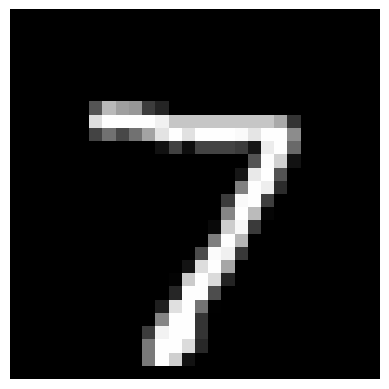

In [ ]:
# Make predictions with the trained model
plt.imshow(test_data[0][0].squeeze(),cmap="gray")
plt.axis(False)
plt.show()

In [ ]:
# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device)) # Make sure image is right shape + right device
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

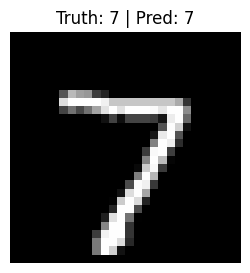

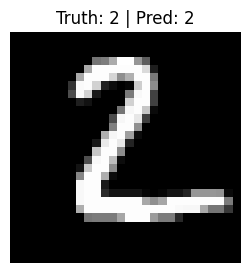

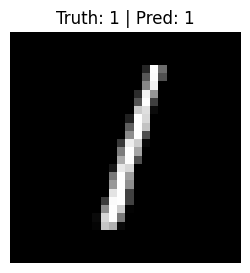

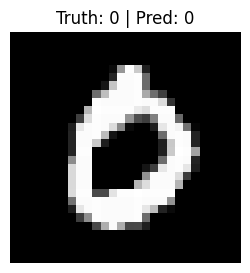

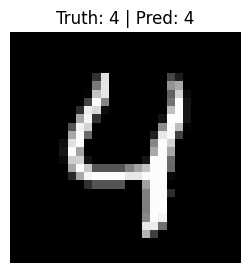

In [ ]:
# Making a plot version for the truth and prediction images and labels
num_to_plot = 5
for i in range(num_to_plot):
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure(figsize=(3, 3))
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False)
  plt.show()

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
# See if torchmetrics exists, if not, install it
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19 # mlxtend version should be greater than 19
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 kB 5.6 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [ ]:
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >=19

0.22.0


In [ ]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data is on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model_gpu(X)
    # Logits -> Preb Probs -> Pred Labels
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)

  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

In [ ]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

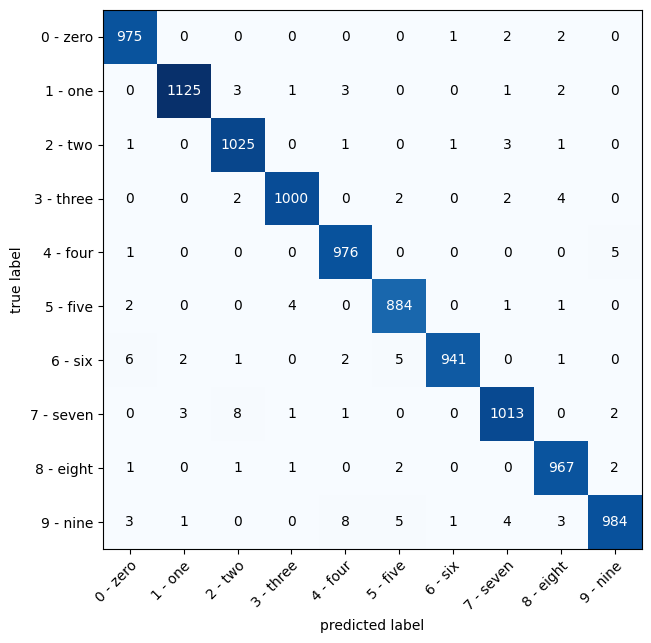

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}\n")
random_tensor_through_conv2d = conv_layer(random_tensor)
print(f"Random tensor shape after passing through conv2d: {random_tensor_through_conv2d.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])

Random tensor shape after passing through conv2d: torch.Size([1, 10, 64, 64])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
# Download FashionMNIST train and test
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root="data",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor(),
                                            target_transform=None)

fashion_mnist_test = datasets.FashionMNIST(root="data",
                                           download=True,
                                           train=False,
                                           transform=transforms.ToTensor(),
                                           target_transform=None)

len(fashion_mnist_train), len(fashion_mnist_test)

100%|██████████| 26421880/26421880 [00:01<00:00, 15976657.39it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273937.63it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5052666.13it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12568263.67it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



(60000, 10000)

In [ ]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(dataset=fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(dataset=fashion_mnist_test,
                                            batch_size=32,
                                            shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [ ]:
# model_2 is the same architecture as MNIST_model
model_2 = MNIST_model(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)
model_2

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Setup loss and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [ ]:
# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(num_classes=len(fashion_mnist_class_names), task="multiclass").to(device)

# Setup training/testing loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0

  ### Training
  model_2.train()
  for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Forward pass and loss
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss +=loss
    train_acc += acc_fn(y_pred, y_train)

    # Backpropagation and gradient descent
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Adjust the loss/acc (find the loss/acc per epoch)
  train_loss /= len(fashion_mnist_train_dataloader)
  train_acc /= len(fashion_mnist_train_dataloader)

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward pass and loss
      y_pred_test = model_2(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss
      test_acc += acc_fn(y_pred_test, y_test)

    # Adjust the loss/acc (find the loss/acc per epoch)
    test_loss /= len(fashion_mnist_test_dataloader)
    test_acc /= len(fashion_mnist_test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.151 | Train acc: 0.59 | Test loss: 218.907 | Test acc: 0.75
Epoch: 1 | Train loss: 0.531 | Train acc: 0.81 | Test loss: 158.769 | Test acc: 0.81
Epoch: 2 | Train loss: 0.448 | Train acc: 0.84 | Test loss: 135.730 | Test acc: 0.85
Epoch: 3 | Train loss: 0.407 | Train acc: 0.85 | Test loss: 131.146 | Test acc: 0.85
Epoch: 4 | Train loss: 0.377 | Train acc: 0.86 | Test loss: 126.967 | Test acc: 0.85


In [ ]:
# Make predictions with trained model_2
test_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_2(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)

test_preds = torch.cat(test_preds).cpu()
test_preds[:10], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [ ]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1522

- `random.sample()`

`sample()` is an inbuilt function of random module in Python that returns a particular length list of items chosen from the sequence i.e. list, tuple, string or set. Used for random sampling without replacement.

Syntax : random.sample(sequence, k)

Parameters:
sequence: Can be a list, tuple, string, or set.
k: An Integer value, it specify the length of a sample.

Returns: k length new list of elements chosen from the sequence.

In [ ]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)
random_selection

[8111, 2905, 8814, 8080, 6024, 8323, 255, 2626, 4274]

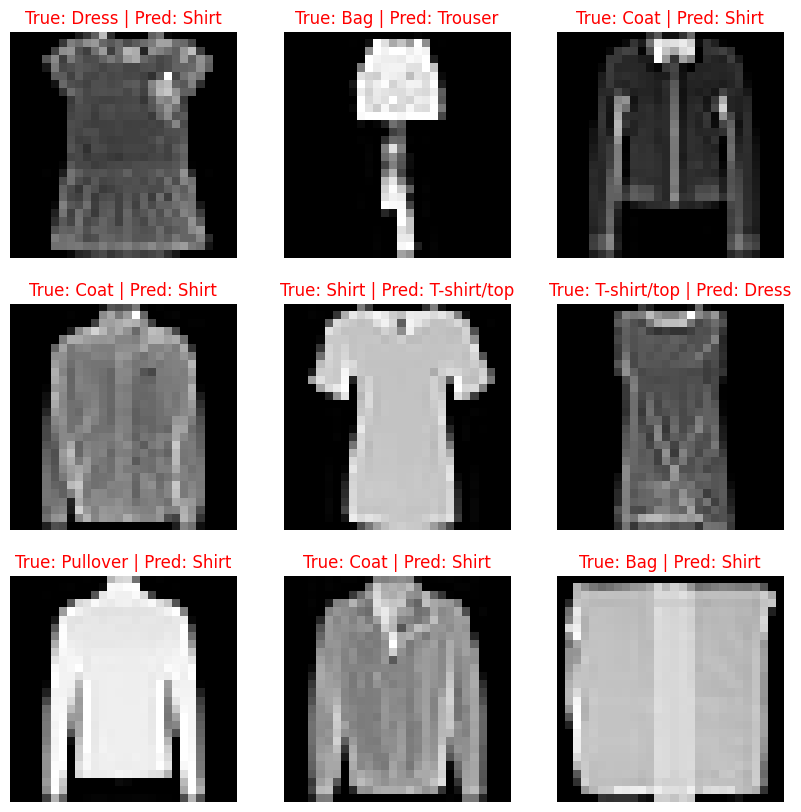

In [ ]:
plt.figure(figsize=(10,10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);

In [ ]:
fashion_mnist_test[idx]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.7098, 0.5608, 0.4706, 0.4196, 0.4510, 0.4980,
           0.5294, 0.5882, 0.6000, 0.6627, 0.8353, 0.7176, 0.8157, 0.7686,
           0.5922, 0.4314, 0.4549, 0.4941, 0.5255, 0.5137, 0.4902, 0.4824,
           0.5333, 0.3333, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.7216, 0.7725, 0.7490, 0.7608, 0.7569, 0.7529,
           0.7529, 0.7569, 0.7373, 0.7529, 0.8549, 0.8510, 0.8431, 0.8784,
           0.8275, 0.7373, 0.7490, 0.7490, 0.7451, 0.7490, 0.7451, 0.7451,
           0.7255, 0.8039, 0.6667, 0.0000],
          [0.0000, 0.1569, 0.7765, 0.7451, 0.7255, 0.7216, 0.7216, 0.7255,
           0.7255, 0.7294, 0.7255, 0.7490, 0.8078, 0.8078, 0.8039, 0.8078,
           0.7843, 0.6980, 0.6863, 0.7098, 

In [ ]:
fashion_mnist_test[idx][1]

8

#### Manan Kumar